**Sports ball prediction**

In this project, we're building a CNN model that can predict  a sports ball type,Her we train our model with images of different sports ball

***Dstaset***

 Dataset contain images of sports balls from 5 different sports. These are: basketball, cricket ball, football, tennis ball and volleyball.
 Dataset link : https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification

Importing modules

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import numpy as np

In [ ]:
os.listdir('/content/drive/MyDrive/Sports balls test')

['volleyball', 'tennis_ball', 'football', 'cricket_ball', 'basketball']

In [ ]:
os.listdir('/content/drive/MyDrive/Sports balls train')

['tennis_ball', 'volleyball', 'cricket_ball', 'football', 'basketball']

Loading train data,

In [ ]:
datadir='/content/drive/MyDrive/Sports balls train'
X_train=[]
y_train=[]
categories=['volleyball', 'tennis_ball', 'football', 'cricket_ball', 'basketball']
for i in categories:
  print("Loading...",i)
  sub_path=os.path.join(datadir,i)
  images=os.listdir(sub_path)
  for img in images:
    img_path=os.path.join(sub_path,img)
    img_array=imread(img_path)
    img_resize=resize(img_array,(123,123,3))
    X_train.append(img_resize)
    y_train.append(categories.index(i))
  print("Loaded....",i)

Loading... volleyball
Loaded.... volleyball
Loading... tennis_ball
Loaded.... tennis_ball
Loading... football
Loaded.... football
Loading... cricket_ball
Loaded.... cricket_ball
Loading... basketball
Loaded.... basketball


Loading test data

In [ ]:
ddir='/content/drive/MyDrive/Sports balls test'
X_test=[]
y_test=[]
catgrs=['volleyball', 'tennis_ball', 'football', 'cricket_ball', 'basketball']
for i in catgrs:
  print("Loading...",i)
  sub_path=os.path.join(ddir,i)
  images=os.listdir(sub_path)
  for img in images:
    img_path=os.path.join(sub_path,img)
    img_array=imread(img_path)

    img_resize=resize(img_array,(123,123,3))
    X_test.append(img_resize)
    y_test.append(catgrs.index(i))
  print("Loaded...",i)

Loading... volleyball
Loaded... volleyball
Loading... tennis_ball
Loaded... tennis_ball
Loading... football
Loaded... football
Loading... cricket_ball
Loaded... cricket_ball
Loading... basketball
Loaded... basketball


changing into array format

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

Model object cration and adding layers

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(123,123,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model creation

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=30)

Epoch 1/10
83/83 [==============================] - 48s 553ms/step - loss: 1.4740 - accuracy: 0.4491
Epoch 2/10
83/83 [==============================] - 41s 495ms/step - loss: 1.0366 - accuracy: 0.6149
Epoch 3/10
83/83 [==============================] - 39s 469ms/step - loss: 0.7995 - accuracy: 0.7142
Epoch 4/10
83/83 [==============================] - 41s 490ms/step - loss: 0.5850 - accuracy: 0.7933
Epoch 5/10
83/83 [==============================] - 41s 500ms/step - loss: 0.3667 - accuracy: 0.8865
Epoch 6/10
83/83 [==============================] - 42s 501ms/step - loss: 0.2265 - accuracy: 0.9347
Epoch 7/10
83/83 [==============================] - 41s 490ms/step - loss: 0.1304 - accuracy: 0.9623
Epoch 8/10
83/83 [==============================] - 44s 529ms/step - loss: 0.0678 - accuracy: 0.9858
Epoch 9/10
83/83 [==============================] - 42s 503ms/step - loss: 0.0446 - accuracy: 0.9878
Epoch 10/10
83/83 [==============================] - 42s 499ms/step - loss: 0.0263 - accura

EValuating test data

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print("loss :",loss)
print("accuracy :",accuracy)

20/20 [==============================] - 5s 208ms/step - loss: 1.7511 - accuracy: 0.6943
loss : 1.751064658164978
accuracy : 0.6943089365959167


In [ ]:
y_pred=model.predict(X_test)
y_pred

20/20 [==============================] - 2s 119ms/step


array([[9.6935320e-01, 3.1302057e-03, 2.6787311e-02, 2.8382556e-04,
        4.4545211e-04],
       [1.1389974e-01, 7.9055864e-01, 3.6054488e-02, 3.5327740e-03,
        5.5954341e-02],
       [9.9974322e-01, 2.5359495e-10, 2.5079356e-04, 1.8703763e-07,
        5.8290343e-06],
       ...,
       [6.2433195e-01, 1.0869654e-03, 1.0994965e-01, 1.2970510e-02,
        2.5166091e-01],
       [1.7591365e-04, 1.7946963e-06, 3.3918824e-02, 3.0336712e-04,
        9.6560007e-01],
       [1.8620838e-05, 3.6198633e-06, 4.0816155e-07, 3.1599239e-02,
        9.6837807e-01]], dtype=float32)

              precision    recall  f1-score   support

           0       0.81      0.50      0.61       109
           1       0.66      0.79      0.72       123
           2       0.67      0.75      0.71       151
           3       0.73      0.72      0.73       146
           4       0.64      0.67      0.66        86

    accuracy                           0.69       615
   macro avg       0.70      0.69      0.69       615
weighted avg       0.70      0.69      0.69       615



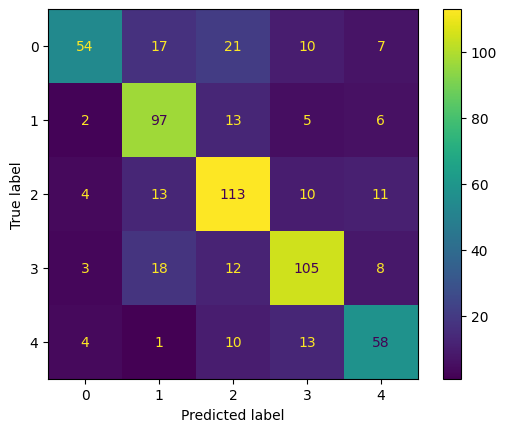

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

print(classification_report(y_test,y_pred.argmax(axis=1)))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred.argmax(axis=1)))

In [ ]:
# model.save('asl_cnn.h5')

Predicting new image

In [ ]:
def predit(path):
  img=imread(path)
  rimg=resize(img,(1,123,123,3))
  y_new=model.predict(rimg)
  i=y_new.argmax()

  return categories[i]




In [ ]:
predit('/content/drive/MyDrive/Sports balls train/tennis_ball/tennis_145.jpg')

1/1 [==============================] - 0s 85ms/step


'tennis_ball'

In [ ]:
model.save('sbcnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
